# ResNet-50 Models

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers as tkl
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data()
classes = ["apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle", "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle", "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor", "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"]

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [3]:
X_train = X_train / 255
X_test = X_test / 255

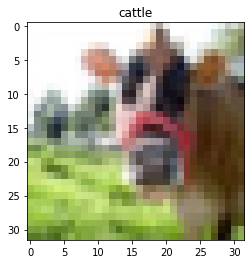

In [4]:
plt.imshow(X_train[0])
plt.title(classes[y_train[0]])
plt.show()

In [5]:
def residual_block(X, concat, filters, kernel_size):
    conv3x3_v1 = tkl.Conv2D(filters, kernel_size = kernel_size, strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = "he_normal", bias_initializer = "he_normal")(X)
    conv3x3_v2 = tkl.Conv2D(filters, kernel_size = kernel_size, strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = "he_normal", bias_initializer = "he_normal")(conv3x3_v1)
    output = tkl.Concatenate(axis = 3)([conv3x3_v2, concat])
    return output, conv3x3_v2

### 1. ResNet Model v1 - 2

In [6]:
def resnet_v1():
    input_layer = keras.Input(shape = (32, 32, 3), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = "he_normal", bias_initializer = "he_normal")(input_layer)
    
    R2, A2 = residual_block(A1, A1, 64, (3, 3))
    R3, A3 = residual_block(R2, A2, 64, (3, 3))
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(R3)
    
    output = tkl.Dense(100, activation = "softmax", name = "output", kernel_initializer = "he_normal", bias_initializer = "he_normal")(P5)
    
    model = keras.Model(input_layer, output, name = "ResNetv1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [7]:
resnet_v1 = resnet_v1()

Metal device set to: Apple M1 Pro


2022-10-25 20:07:16.432174: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-25 20:07:16.432289: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
history = resnet_v1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20


2022-10-25 20:07:16.903256: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


   1/1563 [..............................] - ETA: 10:32 - loss: 4.9194 - accuracy: 0.0000e+00

2022-10-25 20:07:17.132531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 4.0000 - accuracy: 0.0847

2022-10-25 20:07:47.964746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 35s 22ms/step - loss: 4.0000 - accuracy: 0.0847 - val_loss: 3.6475 - val_accuracy: 0.1354
Epoch 2/20
1563/1563 [==============================] - 35s 22ms/step - loss: 3.4176 - accuracy: 0.1832 - val_loss: 3.1927 - val_accuracy: 0.2232
Epoch 3/20
1563/1563 [==============================] - 34s 22ms/step - loss: 3.0742 - accuracy: 0.2493 - val_loss: 2.9273 - val_accuracy: 0.2790
Epoch 4/20
1563/1563 [==============================] - 48s 30ms/step - loss: 2.8470 - accuracy: 0.2893 - val_loss: 2.8013 - val_accuracy: 0.3012
Epoch 5/20
1563/1563 [==============================] - 38s 25ms/step - loss: 2.6770 - accuracy: 0.3244 - val_loss: 2.6514 - val_accuracy: 0.3234
Epoch 6/20
1563/1563 [==============================] - 33s 21ms/step - loss: 2.5395 - accuracy: 0.3494 - val_loss: 2.5773 - val_accuracy: 0.3485
Epoch 7/20
1563/1563 [==============================] - 33s 21ms/step - loss: 2.4304 - accuracy: 0.3721 - val_loss: 2.5084 - val_accura

In [9]:
predictions = resnet_v1.predict(X_test)

 16/313 [>.............................] - ETA: 2s

2022-10-25 20:18:47.596087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step


In [10]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 100)

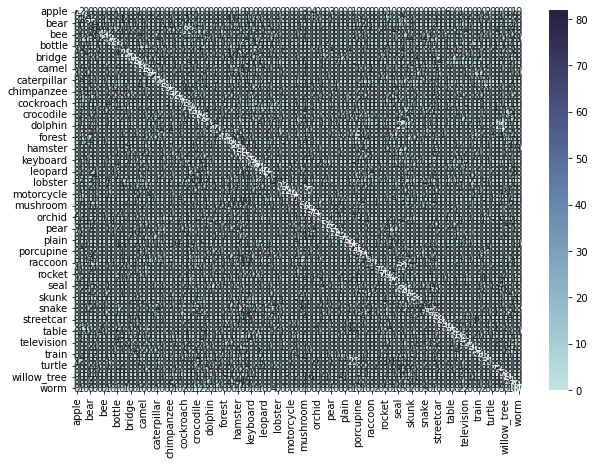

In [11]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### 2. ResNet Model v2 - 4

In [12]:
def resnet_v2():
    input_layer = keras.Input(shape = (32, 32, 3), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = "he_normal", bias_initializer = "he_normal")(input_layer)
    
    R2, A2 = residual_block(A1, A1, 64, (3, 3))
    R3, A3 = residual_block(R2, A2, 64, (3, 3))
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same")(R3)
    
    R4, A4 = residual_block(P2, P2, 128, (3, 3))
    R5, A5 = residual_block(R4, A4, 128, (3, 3))
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(R5)
    
    output = tkl.Dense(100, activation = "softmax", name = "output", kernel_initializer = "he_normal", bias_initializer = "he_normal")(P5)
    
    model = keras.Model(input_layer, output, name = "ResNetv2")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [13]:
resnet_v2 = resnet_v2()

In [14]:
history = resnet_v2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20


2022-10-25 20:18:55.431190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 3.9339 - accuracy: 0.0916

2022-10-25 20:19:46.683667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 55s 34ms/step - loss: 3.9339 - accuracy: 0.0916 - val_loss: 3.4643 - val_accuracy: 0.1691
Epoch 2/20
1563/1563 [==============================] - 54s 34ms/step - loss: 3.1182 - accuracy: 0.2344 - val_loss: 2.8437 - val_accuracy: 0.2859
Epoch 3/20
1563/1563 [==============================] - 55s 35ms/step - loss: 2.5994 - accuracy: 0.3326 - val_loss: 2.4381 - val_accuracy: 0.3610
Epoch 4/20
1563/1563 [==============================] - 56s 36ms/step - loss: 2.2366 - accuracy: 0.4071 - val_loss: 2.2082 - val_accuracy: 0.4125
Epoch 5/20
1563/1563 [==============================] - 57s 36ms/step - loss: 1.9782 - accuracy: 0.4676 - val_loss: 2.0770 - val_accuracy: 0.4511
Epoch 6/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.7865 - accuracy: 0.5119 - val_loss: 1.9989 - val_accuracy: 0.4725
Epoch 7/20
1563/1563 [==============================] - 54s 35ms/step - loss: 1.6219 - accuracy: 0.5514 - val_loss: 1.9195 - val_accura

In [15]:
predictions = resnet_v2.predict(X_test)

 12/313 [>.............................] - ETA: 2s

2022-10-25 20:36:53.868619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 9ms/step


In [16]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 100)

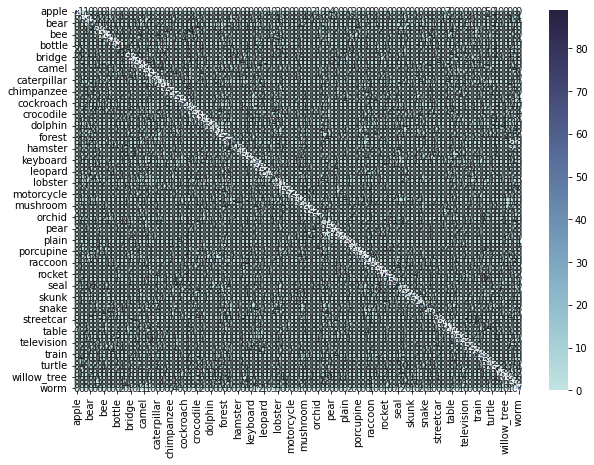

In [17]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### 3. ResNet Model v3 - 6

In [18]:
def resnet_v3():
    input_layer = keras.Input(shape = (32, 32, 3), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = "he_normal", bias_initializer = "he_normal")(input_layer)
    
    R2, A2 = residual_block(A1, A1, 64, (3, 3))
    R3, A3 = residual_block(R2, A2, 64, (3, 3))
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same")(R3)
    
    R4, A4 = residual_block(P2, P2, 128, (3, 3))
    R5, A5 = residual_block(R4, A4, 128, (3, 3))
    
    P3 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same")(R5)
    
    R6, A6 = residual_block(P3, P3, 256, (3, 3))
    R7, A7 = residual_block(R6, A6, 256, (3, 3))
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(R7)
    
    output = tkl.Dense(100, activation = "softmax", name = "output", kernel_initializer = "he_normal", bias_initializer = "he_normal")(P5)
    
    model = keras.Model(input_layer, output, name = "ResNetv3")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [19]:
resnet_v3 = resnet_v3()

In [20]:
history = resnet_v3.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20


2022-10-25 20:37:02.559463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 3.9617 - accuracy: 0.0849

2022-10-25 20:38:12.556025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 75s 47ms/step - loss: 3.9617 - accuracy: 0.0849 - val_loss: 3.5955 - val_accuracy: 0.1443
Epoch 2/20
1563/1563 [==============================] - 73s 47ms/step - loss: 3.0808 - accuracy: 0.2359 - val_loss: 2.7298 - val_accuracy: 0.3008
Epoch 3/20
1563/1563 [==============================] - 73s 47ms/step - loss: 2.4878 - accuracy: 0.3540 - val_loss: 2.3662 - val_accuracy: 0.3785
Epoch 4/20
1563/1563 [==============================] - 73s 47ms/step - loss: 2.1105 - accuracy: 0.4349 - val_loss: 2.1481 - val_accuracy: 0.4328
Epoch 5/20
1563/1563 [==============================] - 73s 47ms/step - loss: 1.8269 - accuracy: 0.5008 - val_loss: 2.0725 - val_accuracy: 0.4587
Epoch 6/20
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5795 - accuracy: 0.5564 - val_loss: 2.0818 - val_accuracy: 0.4647
Epoch 7/20
1563/1563 [==============================] - 73s 47ms/step - loss: 1.3604 - accuracy: 0.6111 - val_loss: 2.1450 - val_accura

In [21]:
predictions = resnet_v3.predict(X_test)

  4/313 [..............................] - ETA: 5s 

2022-10-25 21:01:28.608779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 14ms/step


In [22]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 100)

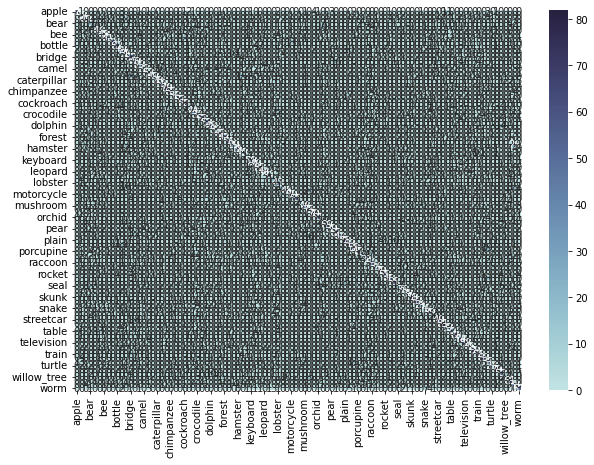

In [23]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### 4. ResNet Model v4 - 8

In [24]:
def resnet_v4():
    input_layer = keras.Input(shape = (32, 32, 3), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = "he_normal", bias_initializer = "he_normal")(input_layer)
    
    R2, A2 = residual_block(A1, A1, 64, (3, 3))
    R3, A3 = residual_block(R2, A2, 64, (3, 3))
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same")(R3)
    
    R4, A4 = residual_block(P2, P2, 128, (3, 3))
    R5, A5 = residual_block(R4, A4, 128, (3, 3))
    
    P3 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same")(R5)
    
    R6, A6 = residual_block(P3, P3, 256, (3, 3))
    R7, A7 = residual_block(R6, A6, 256, (3, 3))
    
    P4 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same")(R7)
    
    R8, A8 = residual_block(P4, P4, 512, (3, 3))
    R9, A9 = residual_block(R8, A8, 512, (3, 3))
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(R9)
    
    output = tkl.Dense(100, activation = "softmax", name = "output", kernel_initializer = "he_normal", bias_initializer = "he_normal")(P5)
    
    model = keras.Model(input_layer, output, name = "ResNetv4")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [25]:
resnet_v4 = resnet_v4()

In [26]:
resnet_v4.summary()

Model: "ResNetv4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_27 (Conv2D)             (None, 32, 32, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 conv2d_28 (Conv2D)             (None, 32, 32, 64)   36928       ['conv2d_27[0][0]']              
                                                                                                  
 conv2d_29 (Conv2D)             (None, 32, 32, 64)   36928       ['conv2d_28[0][0]']              
                                                                                           

In [27]:
history = resnet_v4.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20


2022-10-25 21:01:39.304141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 4.6273 - accuracy: 0.0108

2022-10-25 21:03:11.962760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 99s 62ms/step - loss: 4.6273 - accuracy: 0.0108 - val_loss: 4.6074 - val_accuracy: 0.0097
Epoch 2/20
1563/1563 [==============================] - 97s 62ms/step - loss: 4.2127 - accuracy: 0.0475 - val_loss: 3.7770 - val_accuracy: 0.1081
Epoch 3/20
1563/1563 [==============================] - 97s 62ms/step - loss: 3.5527 - accuracy: 0.1480 - val_loss: 3.2921 - val_accuracy: 0.2000
Epoch 4/20
1563/1563 [==============================] - 97s 62ms/step - loss: 3.1104 - accuracy: 0.2291 - val_loss: 2.9664 - val_accuracy: 0.2590
Epoch 5/20
1563/1563 [==============================] - 97s 62ms/step - loss: 2.7468 - accuracy: 0.3013 - val_loss: 2.7921 - val_accuracy: 0.3019
Epoch 6/20
1563/1563 [==============================] - 97s 62ms/step - loss: 2.4644 - accuracy: 0.3579 - val_loss: 2.5998 - val_accuracy: 0.3415
Epoch 7/20
1563/1563 [==============================] - 96s 62ms/step - loss: 2.2000 - accuracy: 0.4150 - val_loss: 2.5793 - val_accura

In [28]:
predictions = resnet_v4.predict(X_test)

2022-10-25 21:33:51.876873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 16ms/step


In [29]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 100)

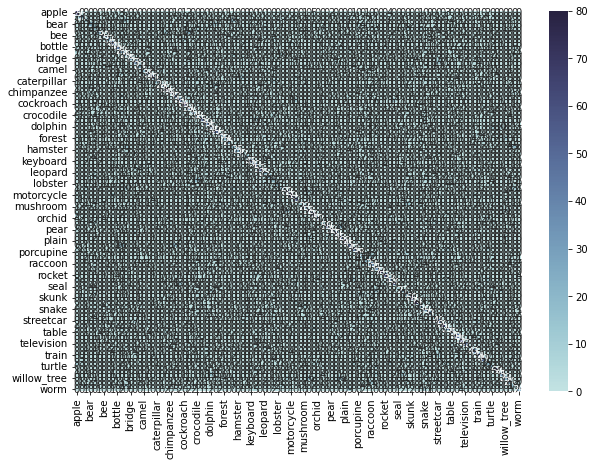

In [30]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()